# LanguageWhisperer: Facilitate your language learning with Transformers!


In [1]:
#@title Setup
transformers_version = "v4.29.0" #@param ["main", "v4.29.0"] {allow-input: true}

print(f"Setting up everything with transformers version {transformers_version}")

!pip install huggingface_hub>=0.14.1 git+https://github.com/huggingface/transformers@$transformers_version -q diffusers accelerate datasets torch soundfile sentencepiece opencv-python openai

import IPython
import soundfile as sf

def play_audio(audio):
    sf.write("speech_converted.wav", audio.numpy(), samplerate=16000)
    return IPython.display.Audio("speech_converted.wav")

from huggingface_hub import notebook_login
notebook_login()

Setting up everything with transformers version v4.29.0


We'll start by instantiating an **agent**, which is a large language model (LLM). Here we use a StarCoder agent:

In [2]:
#@title Agent init
agent_name = "StarCoder (HF Token)" #@param ["StarCoder (HF Token)", "OpenAssistant (HF Token)", "OpenAI (API Key)"]

import getpass

if agent_name == "StarCoder (HF Token)":
    from transformers.tools import HfAgent
    agent = HfAgent("https://api-inference.huggingface.co/models/bigcode/starcoder")
    print("StarCoder is initialized 💪")
elif agent_name == "OpenAssistant (HF Token)":
    from transformers.tools import HfAgent
    agent = HfAgent(url_endpoint="https://api-inference.huggingface.co/models/OpenAssistant/oasst-sft-4-pythia-12b-epoch-3.5")
    print("OpenAssistant is initialized 💪")
if agent_name == "OpenAI (API Key)":
    from transformers.tools import OpenAiAgent
    pswd = getpass.getpass('OpenAI API key:')
    agent = OpenAiAgent(model="text-davinci-003", api_key=pswd)
    print("OpenAI is initialized 💪")

StarCoder is initialized 💪


## Using the agent

We have a world plenty of different objects and images. And we are able to describe all that we see in our native language. But what if we want to learn a foreign language?


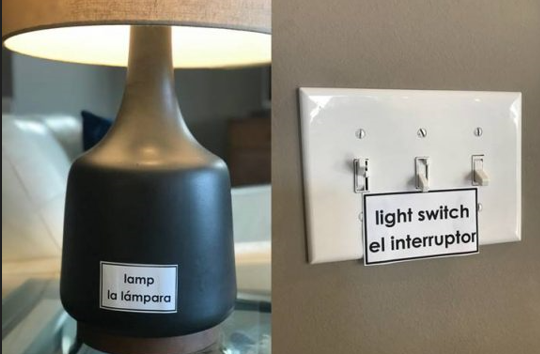




✅ Let's try to label/describe all things that you see in Spanish!

In [3]:
# function to upload the image. 

def upload_files():
    from google.colab import files
    uploaded = files.upload()
    for k, v in uploaded.items():
      open(k, 'wb').write(v)
    return list(uploaded.keys())

uploaded_photos = upload_files()

Saving photo1686078807.jpeg to photo1686078807.jpeg


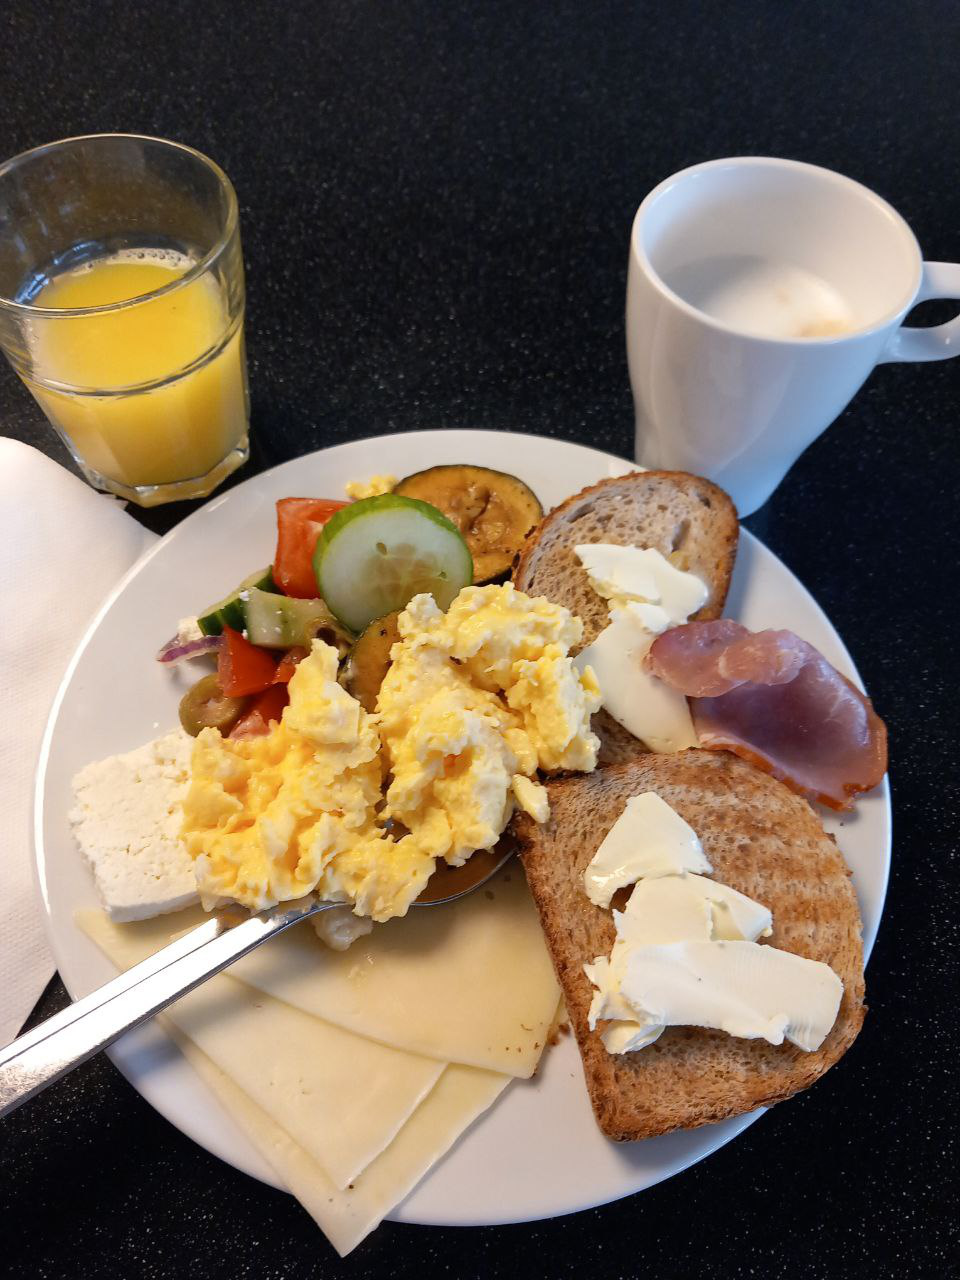

In [4]:
# let's read the first uploaded image

from PIL import Image
 
# Read image
image = Image.open(uploaded_photos[0])
 
# Output Image
image.show()

Ok, what do we have as uploaded photo? 

🍲 Some delicious food, I guess?

In [5]:
# Running agent for generating a caption for the image (in English)

what_on_my_photo = agent.run("Generate a caption for the 'image'", image=image)
what_on_my_photo

==Explanation from the agent==
I will use the following  tool: `image_captioner` to generate a caption for the image.


==Code generated by the agent==
caption = image_captioner(image)


==Result==


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'a plate of food with eggs, hams, and toast'

🥑 Let's discover how to describe it in a language we want to learn!

Note: the language list is taken from here: https://ai.facebook.com/research/no-language-left-behind/#200-languages-accordion

In [6]:
list_of_supported_languages = ['Acehnese', 'Arabic', 'Afrikaans', 'Akan', 'Amharic', 'Assamese', 'Asturian', 'Awadhi', 'Aymara', 'Chinese',
                               'Crimean Tatar', 'Welsh', 'Danish', 'German', 'French', 'Friulian', 'Fulfulde', 'Dinka', 'Dyula',
                               'Dzongkha', 'Greek', 'English', 'Esperanto', 'Estonian', 'Basque', 'Ewe', 'Faroese', 'Iranian Persian', 
                               'Icelandic', 'Italian', 'Javanese', 'Japanese', 'Kabyle', 'Kachin', 'Kamba', 'Kannada', 'Kashmiri', 'Georgian',
                               'Kanuri', 'Kazakh', 'Kabiye', 'Thai', 'Khmer', 'Kikuyu', 'South Azerbaijani', 'North Azerbaijani', 'Bashkir', 'Bambara',
                               'Balinese', 'Belarusian', 'Bemba', 'Bengali', 'Bhojpuri', 'Banjar', 'Tibetan', 'Bosnian', 'Buginese', 'Bulgarian',
                               'Catalan', 'Cebuano', 'Czech', 'Chokwe', 'Central Kurdish', 'Fijian', 'Finnish', 'Fon', 'Scottish Gaelic',
                               'Irish', 'Galician', 'Guarani', 'Gujarati', 'Haitian Creole', 'Hausa', 'Hebrew', 'Hindi', 'Chhattisgarhi',
                               'Croatian', 'Hungarian', 'Armenian', 'Igobo', 'IIocano', 'Indonesian', 'Kinyarwanda', 'Kyrgyz', 'Kimbundu',
                               'Konga', 'Korean', 'Kurdish', 'Lao', 'Latvian', 'Ligurian', 'Limburgish', 'Lingala', 'Lithuanian', 
                               'Lombard', 'Latgalian', 'Luxembourgish', 'Luba-Kasai', 'Ganda', 'Dholuo', 'Mizo', 'Swedish', 'Spanish']

In [8]:
# Running agent for translating the caption to a language of choice
# target_language could be passed from UI (see list_of_supported_languages above)


def translate_captions(target_language, caption):
    return agent.run(f"Can you translate 'caption' to {target_language}?", caption=caption)


target_language_caption = translate_captions(target_language=input("Select a language: "), caption=what_on_my_photo)
target_language_caption

Select a language: Spanish
==Explanation from the agent==
I will use the following  tool: `translator` to translate the caption into Spanish.


==Code generated by the agent==
spanish_caption = translator(caption, src_lang="English", tgt_lang="Spanish")
print(f"The Spanish caption is {spanish_caption}.")


==Result==
The Spanish caption is un plato de comida con huevos, jamones y tostadas.


'un plato de comida con huevos, jamones y tostadas'

And now, let's try to pronounce it like a true native speaker! ✌

*Note: for better results here we can use Amazon Polly for voicing.* 

In [9]:
# Running agent for generating an audio for translated caption (we can try Amazon Polly here)

audio = agent.run("Read out loud the 'translated_sentence'", translated_sentence=target_language_caption)
play_audio(audio)

==Explanation from the agent==
I will use the following  tools: `text_reader` to read the sentence out loud, then `translator` to translate it into English.


==Code generated by the agent==
audio_sentence = text_reader(translated_sentence)


==Result==


Generating validation split: 0 examples [00:00, ? examples/s]

Dataset cmu-arctic-xvectors downloaded and prepared to /root/.cache/huggingface/datasets/Matthijs___cmu-arctic-xvectors/default/0.0.1/a62fea1f9415e240301ea0042ffad2a3aadf4d1caa7f9a8d9512d631723e781f. Subsequent calls will reuse this data.


## Adding new tools: wiki searcher

We'll add a very tool to search the meaning of selected word in Wiki dictionary.

We can do this with the following code:

In [ ]:
import requests
from bs4 import BeautifulSoup

def get_word_page_url(word):
    # Define the base URL for the Wiktionary API
    base_url = "https://en.wiktionary.org/w/api.php"

    # Define the parameters for the API request
    params = {
        "action": "query",
        "format": "json",
        "titles": word,
        "prop": "info",
        "inprop": "url"
    }

    # Send the API request
    response = requests.get(base_url, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Extract the word page URL from the API response
        data = response.json()
        pages = data["query"]["pages"]
        page_id = next(iter(pages))  # Get the first (and only) page ID
        page_info = pages[page_id]
        page_url = page_info["fullurl"]
        return page_url
    else:
        print("Error connecting to the API. Please check your network connection or try again later.")
        return None


def get_word_page_content(word):
    # Retrieve the URL of the word page
    page_url = get_word_page_url(word)

    if page_url:
        # Send a GET request to the word page URL
        response = requests.get(page_url)

        # Check if the request was successful
        if response.status_code == 200:
            # Extract the content from the response using Beautiful Soup
            soup = BeautifulSoup(response.content, "html.parser")
            content_div = soup.find("div", {"id": "mw-content-text"})
            page_content = content_div.get_text()
            return page_content.strip()
        else:
            print("Error connecting to the word page. Please check your network connection or try again later.")
            return None
    else:
        return None

# Example usage
word = input("Enter a word: ")
page_content = get_word_page_content(word)
if page_content:
    print("Word page content:")
    print(page_content)


Enter a word: comida
Word page content:
Contents

1 Asturian

1.1 Noun

1.1.1 Related terms




2 Galician

2.1 Etymology
2.2 Pronunciation
2.3 Noun
2.4 Verb


3 Portuguese

3.1 Etymology
3.2 Pronunciation
3.3 Noun

3.3.1 Derived terms


3.4 Participle


4 Spanish

4.1 Etymology
4.2 Pronunciation
4.3 Noun

4.3.1 Derived terms


4.4 Adjective
4.5 Participle
4.6 Verb
4.7 Further reading




Asturian[edit]
Noun[edit]
comida f (plural comíes)

food
meal
lunch
Synonym: xintar
Related terms[edit]
comer
Galician[edit]
Etymology[edit]
From the past participle of comer (“to eat”).

Pronunciation[edit]
IPA(key): /ko.ˈmi.ða̝/
Noun[edit]
comida f (plural comidas)

food
meal
lunch
Synonym: xantar
Verb[edit]
comida f sg

feminine singular past participle of comer
Portuguese[edit]
Etymology[edit]
From the past participle of comer (“to eat”).

Pronunciation[edit]
 

(Brazil) IPA(key): /koˈmi.dɐ/

(Brazil) IPA(key): /koˈmi.dɐ/
(Southern Brazil) IPA(key): /koˈmi.da/

(Portugal) IPA(key): /kuˈmi.dɐ/ [kuˈ

Let's create a tool that can be used by our system!

All tools depend on the superclass Tool that holds the main attributes necessary. We'll create a class that inherits from it:

In [ ]:
from transformers import Tool

class SearchWordInWikiDictionary(Tool):
    pass

This class has a few needs:

- An attribute name, which corresponds to the name of the tool itself. To be in tune with other tools which have a performative name, we'll name it wiki_dictionary_searcher.
- An attribute description, which will be used to populate the prompt of the agent.
- inputs and outputs attributes. Defining this will help the python interpreter make educated choices about types, and will allow for a gradio-demo to be spawned when we push our tool to the Hub. They're both a list of expected values, which can be text, image, or audio.
- A __call__ method which contains the inference code. This is the code we've played with above!

Here’s what our class looks like now:

In [ ]:
from transformers import Tool
from huggingface_hub import list_models


class SearchWordInWikiDictionary(Tool):
    name = "wiki_dictionary_searcher"
    description = ("This is a tool that searches a word meaning in Wiki dictionary. It takes a word as input, and returns the content of a word page.")

    inputs = ["text"]
    outputs = ["text"]

    def __call__(self, word):
        return print(get_word_page_content(word))

We can simply use and test the tool directly:

In [ ]:
tool = SearchWordInWikiDictionary()
tool(word='alas')

See also: álás, àlas, alās, a las, and άλας
Contents

1 English

1.1 Etymology 1

1.1.1 Alternative forms
1.1.2 Pronunciation
1.1.3 Interjection

1.1.3.1 Derived terms
1.1.3.2 Translations




1.2 Etymology 2

1.2.1 Noun

1.2.1.1 Translations




1.3 Anagrams


2 Aromanian

2.1 Alternative forms
2.2 Etymology
2.3 Verb

2.3.1 Derived terms
2.3.2 Related terms




3 Balinese

3.1 Romanization


4 Cebuano

4.1 Etymology 1

4.1.1 Adverb


4.2 Etymology 2

4.2.1 Noun




5 Estonian

5.1 Noun


6 Finnish

6.1 Alternative forms
6.2 Etymology
6.3 Pronunciation
6.4 Adverb

6.4.1 Inflection
6.4.2 Synonyms
6.4.3 Antonyms


6.5 Interjection
6.6 Verb
6.7 Anagrams


7 Indonesian

7.1 Pronunciation
7.2 Etymology 1

7.2.1 Noun

7.2.1.1 Synonyms
7.2.1.2 Derived terms




7.3 Etymology 2

7.3.1 Noun


7.4 Etymology 3

7.4.1 Noun


7.5 Further reading


8 Javanese

8.1 Alternative forms
8.2 Etymology
8.3 Noun

8.3.1 Descendants


8.4 References


9 Latin

9.1 Etymology 1

9.1.1 Pronunciation
9.1.2 Noun



In order to pass the tool to the agent, we recommend instantiating the agent with the tools directly:

In [ ]:
from transformers.tools import HfAgent

agent = HfAgent("https://api-inference.huggingface.co/models/bigcode/starcoder", additional_tools=[tool])

Let's try to have the agent use it with other tools!

In [ ]:
agent.run("Search a meaning of 'huevos' in wiki")

==Explanation from the agent==
I will use the following  tool: `wiki_dictionary_searcher` to search a meaning of 'huevos' in wiki.


==Code generated by the agent==
meaning = wiki_dictionary_searcher(word="huevos")


==Result==
Contents

1 English

1.1 Noun
1.2 Noun

1.2.1 See also




2 Spanish

2.1 Noun




English[edit]
Noun[edit]
huevos

plural of huevo.
Noun[edit]
huevos pl (plural only)

Huevos rancheros, a Mexican breakfast dish
2007,  January 7,  “Charles Baxter”, in  Breakfast of Champions‎[1]:I dig into my huevos.
(slang) Balls; nerve; bravery; brazenness.
1974,  Jerry Kamstra,  Weed: Adventures of a Dope Smuggler, page 126:Fortunately the magneto's power was limited, or the rods would have circled the table until one of the men had proved that he had real huevos, the implication being that the rest of the men were pussies.
2001,  Lee Taylor,  Bull, →ISBN, page 2:In this business a man has to have balls, real huevos, Dwayne.”
2018,  Daniel Lines,  Crohn's, and a Life with the

In [ ]:
# Let's pretend we are using the Spanish translation from above and searching each word of it in Wiki:

translated_caption = 'un plato de comida con huevos, jamones y tostadas'
converted_to_list_caption = translated_caption.split()

for word in converted_to_list_caption:
    agent.run(f"Search a meaning of '{word}' in wiki")

Streaming output truncated to the last 5000 lines.
2nd - Polite

Sie

Sie

IhneNe (unstressed)

Phalura[edit]
Etymology[edit]
(This etymology is missing or incomplete. Please add to it, or discuss it at the Etymology scriptorium.)

Pronunciation[edit]
IPA(key): /de/
Verb[edit]
de (auxiliary, Perso-Arabic spelling دےۡ)

Past tense marker
References[edit]
Liljegren, Henrik; Haider, Naseem (2011) Palula Vocabulary (FLI Language and Culture Series; 7)‎[9], Islamabad, Pakistan: Forum for Language Initiatives, →ISBN
Portuguese[edit]
Alternative forms[edit]
d' (archaic, except for fixed terms)
Etymology[edit]
From Old Galician-Portuguese de (“of”), from Latin dē (“of”).

Pronunciation[edit]
 

(Brazil) IPA(key): /d͡ʒi/

(Brazil) IPA(key): /d͡ʒi/
(Southern Brazil) IPA(key): /de/

(Portugal) IPA(key): /d(ɨ)/


(Nordestino) IPA(key): /di/
(Caipira) IPA(key): /di/
Hyphenation: de
Preposition[edit]
de

 of (in relation to)
2005,  J. K. Rowling,  Harry Potter e o Enigma do Príncipe [Harry Potter an

Success 🎉
